# Performance: Sensitivity, Specificity and MCC curves
## Lawrence He and Felipe Giuste (2022-09-08)

In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

## Classifiers ##
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Metrics ##
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score, accuracy_score, classification_report

## Utils ##
from utils.sensitivity_specificity import plot_sensitivity_specificity

### Seed ###
random_state = 1234
np.random.seed(random_state)

## User Variables

In [3]:
## Folder paths ##
data_folder = '../Data/'
results_folder='../Results/'
models_folder='../Models/'
figures_folder ='../Figures/Performance/'

## Outcome variable ##
outcome_column='ckd_status'

## Load Data

In [4]:
### Load ###
train_data = pd.read_csv(data_folder+'train_data.csv')
test_data = pd.read_csv(data_folder+'test_data.csv')

### Feature list ###
feature_list = list()
for i in train_data.columns:
    if i[:2] == 'F_':
        feature_list.append(i)
        
### Setup Datasets ###
X_train = train_data[feature_list]#.rename(columns=feature_name_dict)
y_train = train_data[outcome_column]

X_test = test_data[feature_list]#.rename(columns=feature_name_dict)
y_test = test_data[outcome_column]

## Update Feature List ##
feature_list = list(X_test.columns)
print('Total Features: %s'%len(feature_list) )

/var/folders/65/qxp2fcwj00bff0rdg3hmhyx80000gn/T/ipykernel_71910/4276654743.py:2: DtypeWarning: Columns (30,41,42,66,67,68,69,83,87,103,104,105,121,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(data_folder+'train_data.csv')
/var/folders/65/qxp2fcwj00bff0rdg3hmhyx80000gn/T/ipykernel_71910/4276654743.py:3: DtypeWarning: Columns (30,41,42,66,67,68,69,83,87,103,104,105,121,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(data_folder+'test_data.csv')


Total Features: 128


## Models

### RandomForestClassifier: All Features

In [5]:
# ## Classifier ##
# model_type='RandomForestClassifier'

# ## Load hyperparameters ##
# with open(f'{models_folder}/Conventional/HPTuned_{model_type}.pkl', 'rb') as fh:
#     Results_dict = pickle.load(fh)

# # convert results dict values to ints
# for key in Results_dict['hyperparameters']:
#     Results_dict['hyperparameters'][key] = int(Results_dict['hyperparameters'][key])

# print(Results_dict)

# ## Model ##
# model = RandomForestClassifier(random_state=random_state)
# model.set_params(**Results_dict['hyperparameters'])

# ## Train ##
# print('Training')
# model.fit(X=X_train, y=y_train)
# ## Test ##
# print('Testing')
# y_pred_rf = model.predict_proba(X_test)[:,1]

# ## Delete model ##
# del(model)

# Logistic Regression: All Features

In [6]:
## Classifier ##
model_type='LogisticRegression'

## Load hyperparameters ##
with open(f'{models_folder}/Conventional/HPTuned_{model_type}.pkl', 'rb') as fh:
    Results_dict = pickle.load(fh)

# convert results dict values to ints
for key in Results_dict['hyperparameters']:
    if type (Results_dict['hyperparameters'][key]) == float:
        Results_dict['hyperparameters'][key] = int(Results_dict['hyperparameters'][key])

print(Results_dict)

## Model ##
model = LogisticRegression(random_state=random_state)
model.set_params(**Results_dict['hyperparameters'])

## Train ##
print('Training')
model.fit(X=X_train, y=y_train)
## Test ##
print('Testing')
y_pred_rf = model.predict_proba(X_test)[:,1]

{'hyperparameters': {'max_iter': 1000000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}, 'aucroc': 0.83346381498243}
Training
Testing


## Plot

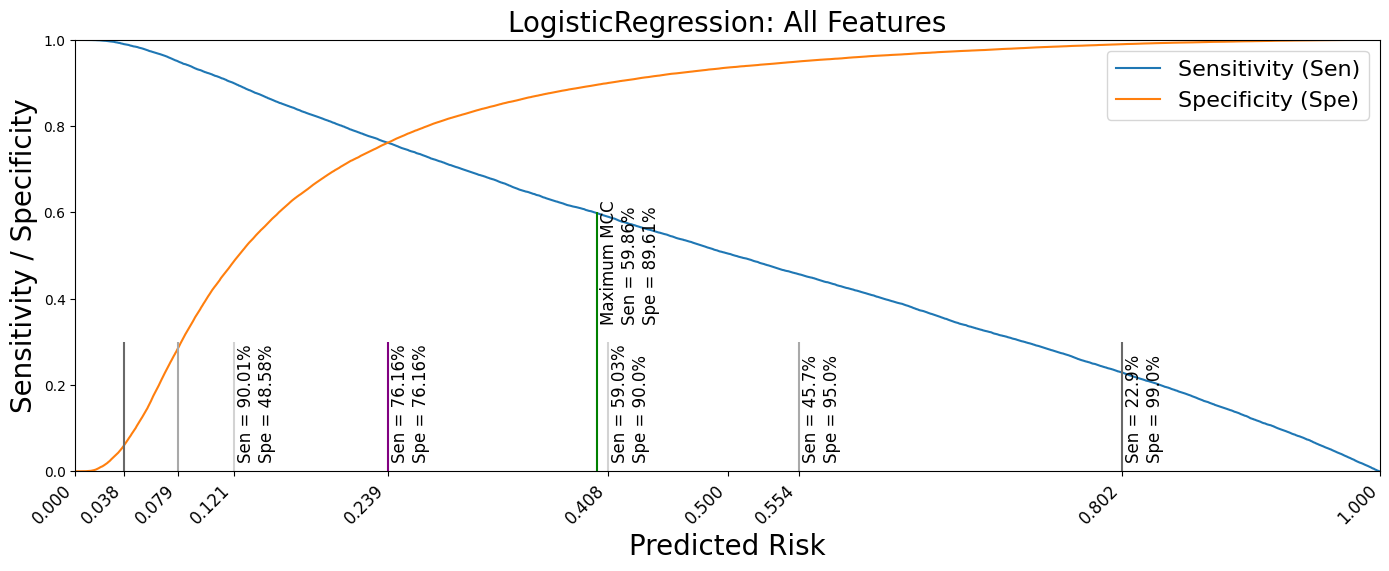

In [8]:
plt.figure(figsize=(14,21))

plt.subplot(4,1,1)
plot_sensitivity_specificity(y_test, y_pred_rf, model_type='RF', title=f'{model_type}: All Features')

# plt.subplot(4,1,2)
# plot_sensitivity_specificity(y_test, y_pred_xgb_top10, model_type='XGB', title='XGBoost: Top10 Features')

# plt.subplot(4,1,3)
# plot_sensitivity_specificity(y_test, y_pred_relu, model_type='NN', title='ReLU Variant: All Features')

# plt.subplot(4,1,4)
# plot_sensitivity_specificity(y_test, y_pred_relu_top10, model_type='NN', title='ReLU Variant: Top10 Features')

plt.tight_layout()
plt.savefig(f'{figures_folder}/sensitivity_specificity_curves.pdf');
plt.show()